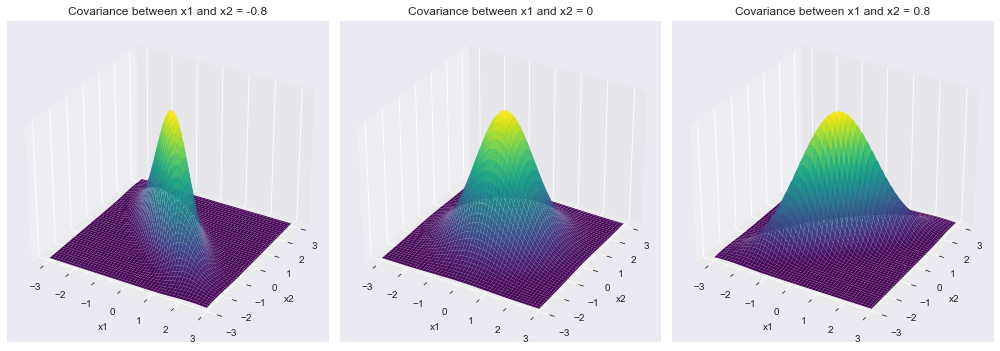

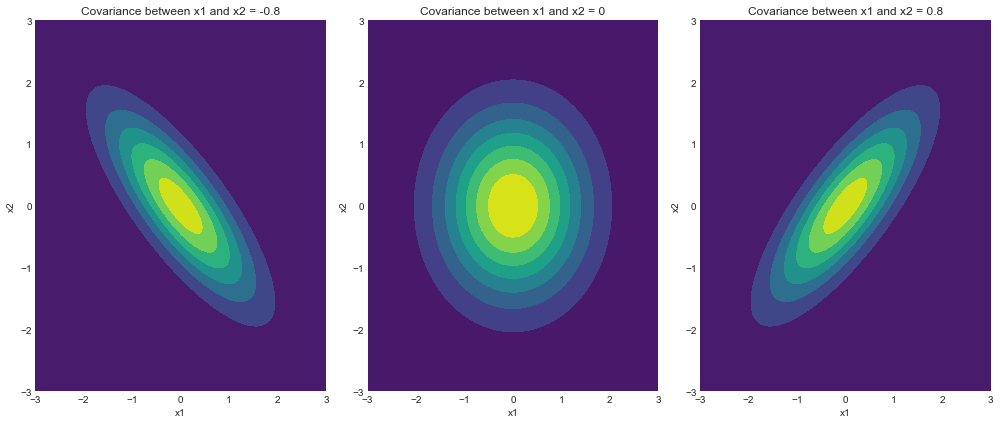

In [2]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])
 
# Storing density function values for
# further analysis
pdf_list = []
 
# Iterating over different covariance values
for idx, val in enumerate(cov_val):
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    # Plotting the density function values
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])
 
plt.tight_layout()
plt.show()
 
# Plotting contour plots
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()

In [75]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 

 
# Initializing the random seed
random_seed=1000

# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])
 
# Storing density function values for
# further analysis
pdf_list = []
 
val = 0.8

# Initializing the covariance matrix
cov = np.array([[1, val], [val, 1]])

# Generating a Gaussian bivariate distribution
# with given mean and covariance matrix


class MyDistr():
    def __init__(self):
        self.weights = np.ones(2)*0.5
        cov_val = np.diag(np.ones(2))
        means = [np.array([3, 0]), np.array([-3, 0])]
        self.distrs = [multivariate_normal(cov = cov_val, mean = means[i]) for i in range(2)]
        
    def pdf(self, pos):
        val = 0
        for i in range(2):
            val += self.weights[i] * self.distrs[i].pdf(pos)
        return val


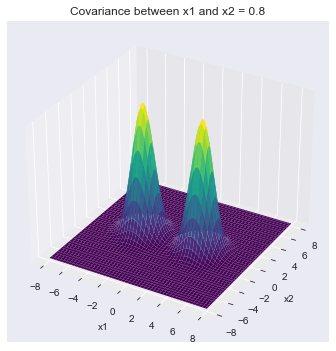

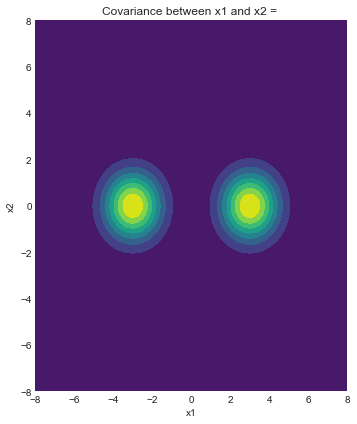

In [78]:
## ------------ do some plotting ------------------
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()

# Generating a meshgrid complacent with
# the 3-sigma boundary
mean_1, mean_2 = mean[0], mean[1]
sigma_1, sigma_2 = cov[0,0], cov[1,1]

x = np.linspace(-8*sigma_1, 8*sigma_1, num=100)
y = np.linspace(-8*sigma_2, 8*sigma_2, num=100)
X, Y = np.meshgrid(x,y)

# Generating the density function
# for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])

# Plotting the density function values
idx=0
key = 131+idx
ax = fig.add_subplot(key, projection = '3d')
ax.plot_surface(X, Y, pdf, cmap = 'viridis')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(f'Covariance between x1 and x2 = {val}')
pdf_list.append(pdf)
ax.axes.zaxis.set_ticks([])
 
plt.tight_layout()
plt.show()
 
# Plotting contour plots
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    # plt.axis('equal')
    plt.title(f'Covariance between x1 and x2 = ')
plt.tight_layout()
plt.show()

In [77]:
import torch

class MyDistr():
    def __init__(self):
        cov_val = np.diag(np.ones(2))
        means = [np.array([3, 0]), np.array([-3, 0])]
        self.distrs = [multivariate_normal(cov = cov_val, mean = means[i]) for i in range(2)]
        
    def pdf_log(self, x):
        val = 0
        for i in range(2):
            val += 0.5 * self.distrs[i].pdf(x)
        return torch.log(torch.tensor(val))
    
    def pdf(self, x):
        val = 0
        for i in range(2):
            val += 0.5 * self.distrs[i].pdf(x)
        return torch.tensor(val)
    
distr = MyDistr()

def logf(x):
      return distr.pdf_log(x) + torch.log(x[:,1]>3)

    
x = torch.tensor([0,0]).unsqueeze(0)
logf(x)

tensor([-inf])

In [98]:
s = torch.ones(1) * 5
torch.log(s>3)

tensor([0.])

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.datasets import co2
import jax
import jax.numpy as jnp
import jaxopt
from tinygp import kernels, GaussianProcess

from nde import distributions, flows, transforms
import nn as nn_

import torch
import numpy as np
from torch.distributions.normal import Normal
import torch.optim as optim
import torch.nn as nn
from nde.flows import realnvp
import tqdm
import matplotlib.pyplot as plt
from nde.flows import autoregressive as ar
from torch.nn.utils import clip_grad_norm_
from scipy.stats import multivariate_normal
from scipy.stats import norm

num_flow_steps=2
dim=2
hidden_features=64
num_transform_blocks=2
dropout_probability=0.0
use_batch_norm=0
num_bins=128
learning_rate = 5e-4
n_total_steps = 1e3


distribution = distributions.TweakedUniform(
    low=torch.zeros(dim),
    high=torch.ones(dim)
)

distribution = distributions.StandardNormal((2,))

def create_alternating_binary_mask(features, even=True):
    """
    Creates a binary mask of a given dimension which alternates its masking.

    :param features: Dimension of mask.
    :param even: If True, even values are assigned 1s, odd 0s. If False, vice versa.
    :return: Alternating binary mask of type torch.Tensor.
    """
    mask = torch.zeros(features).byte()
    start = 0 if even else 1
    mask[start::2] += 1
    return mask

base_transform_type = 'rq'
def create_base_transform(i, _tail_bound):
    if base_transform_type == 'rq':
        return transforms.PiecewiseRationalQuadraticCouplingTransform(
            mask=create_alternating_binary_mask(
                features=dim,
                even=(i % 2 == 0)
            ),
            transform_net_create_fn=lambda in_features, out_features:
            nn_.ResidualNet(
                in_features=in_features,
                out_features=out_features,
                hidden_features=hidden_features,
                num_blocks=num_transform_blocks,
                dropout_probability=dropout_probability,
                use_batch_norm=use_batch_norm
            ),
            num_bins=num_bins,
            apply_unconditional_transform=False,
            tails='linear',
            tail_bound=_tail_bound,
        )
    elif base_transform_type == 'affine':
        return transforms.AffineCouplingTransform(
            mask=create_alternating_binary_mask(
                features=dim,
                even=(i % 2 == 0)
            ),
            transform_net_create_fn=lambda in_features, out_features:
            nn_.ResidualNet(
                in_features=in_features,
                out_features=out_features,
                hidden_features=hidden_features,
                num_blocks=num_transform_blocks,
                dropout_probability=dropout_probability,
                use_batch_norm=use_batch_norm
            )
        )
    else:
        raise ValueError
        
## =================
device = torch.device("cpu")
if torch.cuda.is_available():
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    device = torch.device("cuda:0")
print("==run on=> ", device)


class MyDistr():
    def __init__(self):
        cov_val = np.diag(np.ones(2))
        means = [np.array([3, 0]), np.array([-3, 0])]
        self.distrs = [multivariate_normal(cov = cov_val, mean = means[i]) for i in range(2)]
        
    def pdf_log(self, x):
        return torch.log(self.pdf(x))
    
    def pdf(self, x):
        val = 0
        for i in range(2):
            val += 0.5 * self.distrs[i].pdf(x)
        return torch.tensor(val)
    
distr = MyDistr()

scale = torch.tensor([10.0, 0, 0, 5.0]).reshape(-1, 2)  # scale x 10, scale y 5
offset = torch.tensor([0.0, 3.0]) # offset x 0, y 3

def logf(x):
    return distr.pdf_log(x @ scale + offset) + torch.log(x[:,1]>0)

def calLoss(inputs, log_prob):
    return - ((logf(inputs) - log_prob).exp() * log_prob).mean()    

==run on=>  cpu


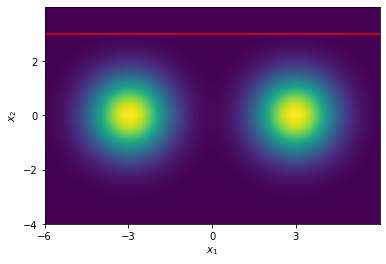

In [84]:
def plotDensity0(dd=100j):
    with torch.no_grad():
        _ = flow.eval()
        ddi = int(dd.imag)
        X, Y = np.mgrid[-6:6:dd, -4:4:dd]
        _z = torch.FloatTensor(np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1))
        
        z = distr.pdf(_z).reshape(ddi, ddi)
        # plt.figure(figsize = (20,20))
        
        plt.imshow(z.T, origin='lower', extent=[-6,6,-4,4], aspect="auto")
        plt.xticks(np.arange(-6, 6, step=3)) 
        plt.yticks(np.arange(-4, 4, step=2))
        plt.xlabel("$x_1$")
        plt.ylabel("$x_2$")
        # plt.axis('equal')
        plt.axhline(y=3, color='r', linestyle='-')
        plt.show()
plotDensity0()

100 tensor(-0.0029) 0.8952807188034058
200 tensor(0.0090) 0.8596482872962952
300 tensor(-0.0127) 0.8594765663146973
400 tensor(0.0070) 0.847658097743988
500 tensor(0.0007) 0.8476366400718689
600 tensor(0.0272) 0.8376470804214478
700 tensor(-0.0096) 0.8306173086166382
800 tensor(0.0226) 0.8349816799163818
900 tensor(0.0027) 0.8275351524353027
1000 tensor(-0.0101) 0.828154981136322
===> tensor(-0.0101) 0.8280404210090637


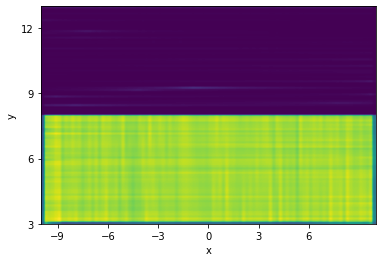

In [79]:
def plotDensity(dd=100j):
    with torch.no_grad():
        _ = flow.eval()
        ddi = int(dd.imag)
        X, Y = np.mgrid[-1:1:dd, 0:2:dd]
        _z = torch.FloatTensor(np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1))
        with torch.no_grad():
            z = flow.log_prob(_z).exp().reshape(ddi, ddi)
        # plt.figure(figsize = (20,20))
        
        plt.imshow(z.T, origin='lower', extent=[-10,10,3,13], aspect="auto")
        plt.xticks(np.arange(-9, 9, step=3)) 
        plt.yticks(np.arange(3, 15, step=3))
        plt.xlabel("x")
        plt.ylabel("y")
        # plt.axis('equal')
        plt.show()

def survey_sample(n):
    x = np.random.uniform(size=n, low =-1, high=1)
    y = np.random.uniform(size=n, low =0, high=1)
    return torch.FloatTensor(np.concatenate([x.reshape(n, 1), y.reshape(n, 1)], axis=1))

transform = transforms.CompositeTransform(
    [create_base_transform(i, 2) for i in range(num_flow_steps)])
flow = flows.Flow(transform, distributions.StandardNormal((2,))).to(device)

optimizer_servy = optim.Adam(flow.parameters(), lr=5e-3)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer_servy, n_total_steps)

history = []
for epoch in range(1000): #tqdm.notebook.tqdm(, desc='Survey', leave=False):
    with torch.no_grad():
        inputs = survey_sample(2000).to(device)
        if(epoch % 100 == 99):
            print(epoch+1, inputs[:,0].mean(), loss.item())

    _ = flow.train()
    optimizer_servy.zero_grad()

    log_prob = flow.log_prob(inputs)
    loss = -torch.mean(log_prob) # calLoss(inputs, log_prob)
    loss.backward()
    optimizer_servy.step()
    scheduler.step()
    # history.append(loss.item())
print("===>", inputs[:,0].mean(), loss.item())
plotDensity()

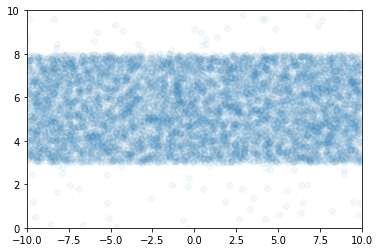

real: 0.0013498980,
mean: 0.0013445364,
 std: 0.0000784878, 
accuracy: 99.603%, 
RE1: 0.00397, 
RE2: -1.464


In [80]:
def calIntegral(needprint=False, n_sample = 5000 ):
    with torch.no_grad():
        _ = flow.eval()
        x, loggx = flow.sample_and_log_prob(n_sample)
        x = x.cpu()
        loggx=loggx.cpu()
        s0, s1 = x[:,0], x[:,1]

        intgral = torch.exp(logf(x) - loggx).mean()

        if(needprint):
            plt.scatter(s0*10, s1*5 + 3, marker='o', alpha=0.05)
            # plt.plot(0, 0, 'rp', markersize=5)
            plt.xlim([-10, 10])
            plt.ylim([0, 10])
            plt.show()
        return intgral

N=100
v = [calIntegral(i==0, 10000)*5*10  for i in range(N)]  # 10 is x scale, 5 is y scale
real = 1-norm.cdf(3)
ell = v -  real
print("real: %.10f,\nmean: %.10f,\n std: %.10f, \naccuracy: %.3f%%, \nRE1: %.5f, \nRE2: %.3f" 
      % (real, np.mean(v), np.std(v), (1-np.abs(np.mean(v) - real)/real)*100, 
         np.abs(np.mean(ell))/ real, np.std(ell)/np.mean(ell)/np.sqrt(N)))

100 tensor(0.0077) -2.3899602759078465e-05
200 tensor(-0.0269) -2.4165112460365134e-05
300 tensor(-0.0153) -2.50718717106019e-05
400 tensor(-0.0302) -2.5545174906539078e-05
500 tensor(-0.0049) -2.491262412611594e-05
600 tensor(-0.0203) -2.580079960144319e-05
700 tensor(0.0129) -2.4997396634516428e-05
800 tensor(0.0174) -2.4260520295499984e-05
900 tensor(-0.0181) -2.553743278067547e-05
1000 tensor(-6.1062e-05) -2.4471411108349965e-05


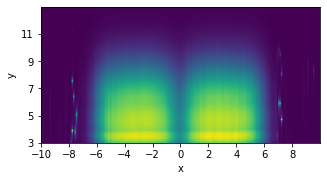

In [101]:
optimizer_refine = optim.Adam(flow.parameters(), lr=5e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer_refine, n_total_steps)  
for epoch in range(1000): #tqdm.notebook.tqdm(, desc='Refine', leave=False):
    with torch.no_grad():
        _ = flow.eval()
        inputs = flow.sample(2000).detach()
        # inputs  = filterInputs(inputs)
        if(epoch % 100 == 99):
            print(epoch+1, inputs[:,0].mean(), loss.item())

    _ = flow.train()
    # scheduler.step(epoch)
    optimizer_refine.zero_grad()

    log_prob = flow.log_prob(inputs)
    loss = calLoss(inputs, log_prob)
    loss.backward()
    optimizer_refine.step()
    history.append(loss.item())

plotDensity()

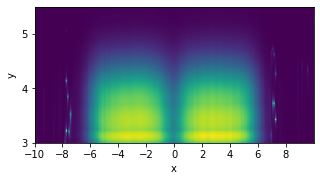

In [104]:
def plotDensity(dd=200j):
    with torch.no_grad():
        _ = flow.eval()
        ddi = int(dd.imag)
        X, Y = np.mgrid[-1:1:dd, 0:0.5:dd]
        _z = torch.FloatTensor(np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1))
        with torch.no_grad():
            z = flow.log_prob(_z).exp().reshape(ddi, ddi)
        plt.figure(figsize = (5,2.5))
        
        plt.imshow(z.T, origin='lower', extent=[-10,10,3,5.5], aspect="auto")
        plt.xticks(np.arange(-10, 10, step=2)) 
        plt.yticks(np.arange(3, 6, step=1))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
plotDensity()

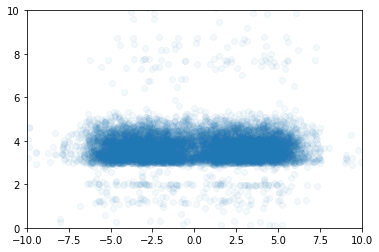

real: 1.34990e-03,
mean: 1.34922e-03,
 std: 2.766e-05, 
accuracy: 99.950%, 
RE1: 5.021e-04, 
RE2: -4.080e+00


In [98]:
def calIntegral(needprint=False, n_sample = 5000 ):
    with torch.no_grad():
        _ = flow.eval()
        x, loggx = flow.sample_and_log_prob(n_sample)
        x = x.cpu()
        loggx=loggx.cpu()
        s0, s1 = x[:,0], x[:,1]

        intgral = torch.exp(logf(x) - loggx).mean()

        if(needprint):
            plt.scatter(s0*10, s1*5 + 3, marker='o', alpha=0.05)
            # plt.plot(0, 0, 'rp', markersize=5)
            plt.xlim([-10, 10])
            plt.ylim([0, 10])
            plt.show()
        return intgral

N = 100
v = [calIntegral(i==0, 10000)*5*10  for i in range(N)]  # 10 is x scale, 5 is y scale
real = 1-norm.cdf(3)
ell = v -  real
print("real: %.5e,\nmean: %.5e,\n std: %.3e, \naccuracy: %.3f%%, \nRE1: %.3e, \nRE2: %.3e" 
      % (real, np.mean(v), np.std(v), (1-np.abs(np.mean(v) - real)/real)*100, 
         np.abs(np.mean(ell))/ real, np.std(ell)/np.mean(ell)/np.sqrt(N)))